## NN Adv Assignment

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Pytorch

import torch
import torch.nn as nn
import torch.nn.functional as F

### TensorFlow

import tensorflow as tf
from tensorflow import keras

import warnings
warnings.filterwarnings(action='ignore')

### Load Data

In [20]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [21]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [22]:
train['label'].nunique()

10

In [23]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,67,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,2,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,93,58,78,45,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,71,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,63,0,0,0,0,0,0,0


In [24]:
X = train.iloc[:, :-1].values
X = X.reshape(-1,28, 28,1) # 흑백이기 때문에 채널이 1
y = train.iloc[:, -1].values

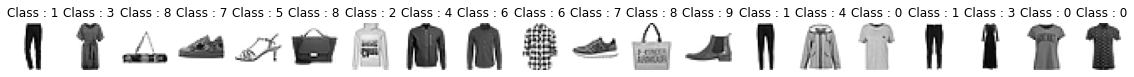

In [25]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X[idx].reshape(28, 28), cmap='gray_r')
  plt.title(f'Class : {y[idx]}')

In [26]:
X_test = test.values
X_test = X_test.reshape(-1,28, 28,1)

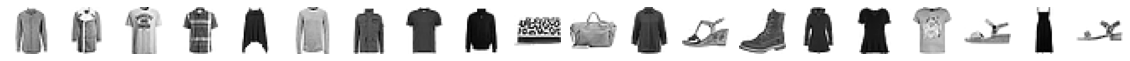

In [27]:
pltsize = 1
plt.figure(figsize=(20 * pltsize, pltsize))
for idx in range(0, 20):
  plt.subplot(1, 20, idx + 1)
  plt.axis('off')
  plt.imshow(X_test[idx].reshape(28, 28), cmap='gray_r')

### Train-Test Split

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 16, stratify = y, shuffle = True)

# 정규화
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Simple DNN

In [29]:
BATCH_SIZE = 128
EPOCHS = 15

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='linear'),
    keras.layers.Dense(256, activation='linear'),
    keras.layers.Dense(128, activation='linear'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [31]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 7s 4ms/step - loss: 0.5743 - accuracy: 0.7976 - val_loss: 0.4793 - val_accuracy: 0.8303
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4731 - accuracy: 0.8333 - val_loss: 0.4704 - val_accuracy: 0.8363
Epoch 3/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.4541 - accuracy: 0.8403 - val_loss: 0.4413 - val_accuracy: 0.8441
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4429 - accuracy: 0.8436 - val_loss: 0.4432 - val_accuracy: 0.8441
Epoch 5/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4365 - accuracy: 0.8471 - val_loss: 0.4826 - val_accuracy: 0.8331
Epoch 6/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4309 - accuracy: 0.8491 - val_loss: 0.4455 - val_accuracy: 0.8430
Epoch 7/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4258 - accuracy: 0.8495 - val_loss: 0.4201 - val_accuracy:

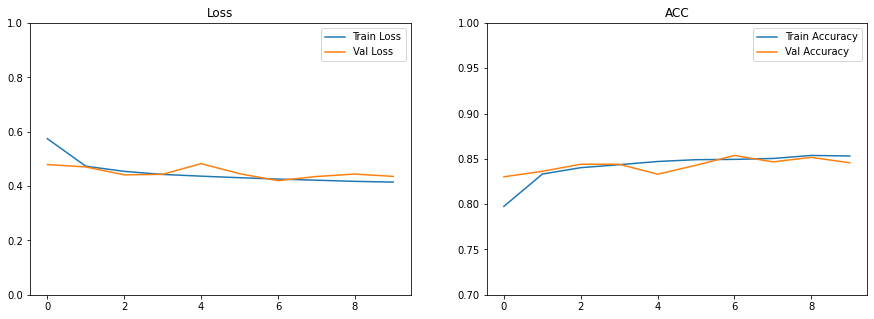

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Activation Function

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 512)               401920    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [36]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.6341 - accuracy: 0.7832 - val_loss: 0.5007 - val_accuracy: 0.8138
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4409 - accuracy: 0.8414 - val_loss: 0.3945 - val_accuracy: 0.8631
Epoch 3/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.3956 - accuracy: 0.8576 - val_loss: 0.3889 - val_accuracy: 0.8607
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3657 - accuracy: 0.8663 - val_loss: 0.3527 - val_accuracy: 0.8742
Epoch 5/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3440 - accuracy: 0.8743 - val_loss: 0.3431 - val_accuracy: 0.8753
Epoch 6/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3264 - accuracy: 0.8794 - val_loss: 0.3564 - val_accuracy: 0.8705
Epoch 7/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3115 - accuracy: 0.8851 - val_loss: 0.3325 - val_accuracy:

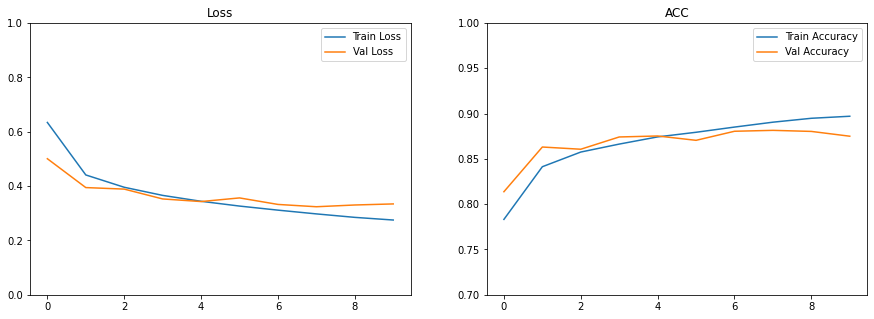

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Weight Initialization

ReLU + He = 고른 분포<br>
고른 분포 -> 모델이 다양성을 가지게 됨(가중치가 다양하고 표현력 좋음)

In [38]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(256, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 10)                1290      
                                                                 
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 6s 4ms/step - loss: 0.5971 - accuracy: 0.7945 - val_loss: 0.4458 - val_accuracy: 0.8418
Epoch 2/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.4247 - accuracy: 0.8489 - val_loss: 0.3814 - val_accuracy: 0.8645
Epoch 3/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3810 - accuracy: 0.8625 - val_loss: 0.3605 - val_accuracy: 0.8713
Epoch 4/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3538 - accuracy: 0.8713 - val_loss: 0.3412 - val_accuracy: 0.8776
Epoch 5/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.3334 - accuracy: 0.8771 - val_loss: 0.3581 - val_accuracy: 0.8683
Epoch 6/10
1488/1488 [==============================] - 5s 4ms/step - loss: 0.3129 - accuracy: 0.8855 - val_loss: 0.3300 - val_accuracy: 0.8812
Epoch 7/10
1488/1488 [==============================] - 5s 3ms/step - loss: 0.2976 - accuracy: 0.8904 - val_loss: 0.3554 - val_accuracy:

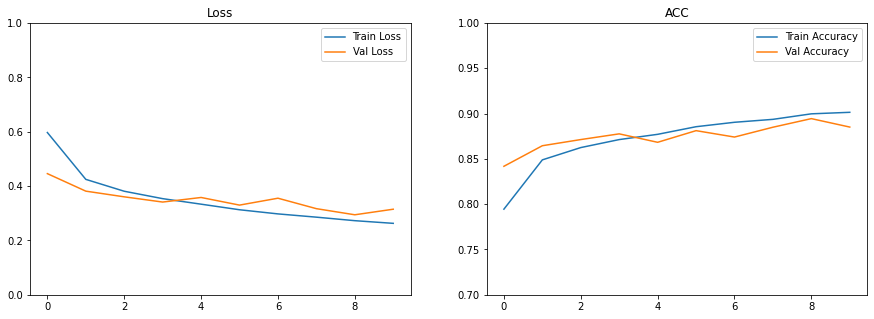

In [41]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Batch Normalization

평균 0, 분산 1로 Nornalize 하여 Internal Covariance Shift 해결<br>
- Internal Covariance Shift : Network의 각 층이나 Activation 마다 Input의 Distribution이 달라지는 현상
- 층마다 일정 하지 않았던 Data의 분포를
일정하게 만들어줌
- 가중치를 고르게 분포 시키는 것과 비슷
- 기울기 소실 / 팽창 방지
- 학습 시 가중치 초기값에 크게 의존하지 않게 해줌
- 결과적으로 학습 개선


In [42]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_16 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_17 (Bat  (None, 256)              1024      
 chNormalization)                                     

In [43]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.5)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 14s 8ms/step - loss: 0.5300 - accuracy: 0.8152 - val_loss: 0.3877 - val_accuracy: 0.8567
Epoch 2/10
1488/1488 [==============================] - 12s 8ms/step - loss: 0.3794 - accuracy: 0.8634 - val_loss: 0.3417 - val_accuracy: 0.8753
Epoch 3/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.3335 - accuracy: 0.8784 - val_loss: 0.3395 - val_accuracy: 0.8749
Epoch 4/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3025 - accuracy: 0.8897 - val_loss: 0.3149 - val_accuracy: 0.8850
Epoch 5/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.2757 - accuracy: 0.8994 - val_loss: 0.3112 - val_accuracy: 0.8853
Epoch 6/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.2540 - accuracy: 0.9081 - val_loss: 0.3222 - val_accuracy: 0.8838
Epoch 7/10
1488/1488 [==============================] - 8s 6ms/step - loss: 0.2353 - accuracy: 0.9140 - val_loss: 0.3229 - val_accura

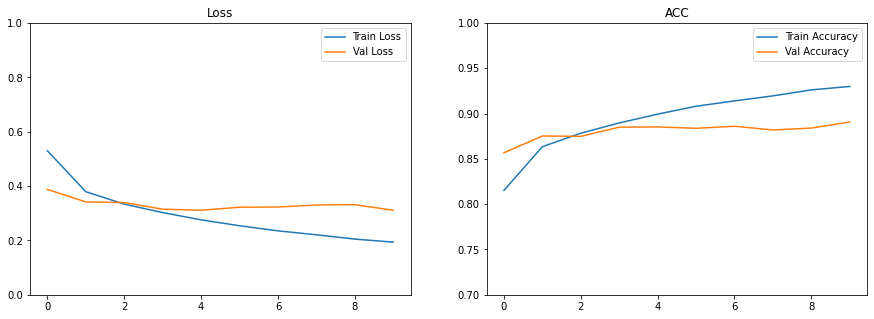

In [45]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Optimization

최적의 파라미터를 찾아가는 것을 의미<br>
- 방향과 스텝사이즈 업데이트를 통해 최적 찾아감

<tab>
그 방법이 여러가지 존재하지만 최근 가장 많이 쓰이고 성능이 좋은 Adam Optimizer 사용<br>
- Adam : Momentum+RMSProp, 편향 보정

In [46]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_19 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 512)               0         
                                                                 
 dense_33 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_20 (Bat  (None, 256)              1024      
 chNormalization)                                     

In [47]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [48]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.5482 - accuracy: 0.8010 - val_loss: 0.4979 - val_accuracy: 0.8314
Epoch 2/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.4187 - accuracy: 0.8467 - val_loss: 0.3818 - val_accuracy: 0.8614
Epoch 3/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3786 - accuracy: 0.8609 - val_loss: 0.3369 - val_accuracy: 0.8745
Epoch 4/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.3525 - accuracy: 0.8707 - val_loss: 0.3275 - val_accuracy: 0.8771
Epoch 5/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3256 - accuracy: 0.8783 - val_loss: 0.3373 - val_accuracy: 0.8759
Epoch 6/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3063 - accuracy: 0.8848 - val_loss: 0.3118 - val_accuracy: 0.8865
Epoch 7/10
1488/1488 [==============================] - 7s 5ms/step - loss: 0.2899 - accuracy: 0.8903 - val_loss: 0.4515 - val_accuracy

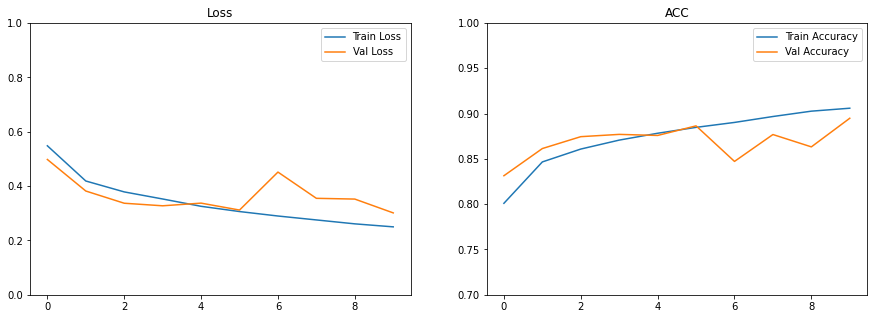

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Dropout

학습 시킬 때 일부러 부분 정보를 누락시키며 융통성을 기르는 방법<br>
이를 통해 weight가 일부에 집착해 서로 동일한 특징을 추출하는 weight 동조현상을 방지할 수 있어 중요한 요소를 스스로 학습하게 함<br>
매번 무작위로 선택하기 때문에 학습시간은 증가함


In [50]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_22 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 512)               0         
                                                                 
 dropout_20 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 256)               131328    
                                                      

In [51]:
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 11s 7ms/step - loss: 0.5904 - accuracy: 0.7900 - val_loss: 0.4778 - val_accuracy: 0.8361
Epoch 2/10
1488/1488 [==============================] - 8s 6ms/step - loss: 0.4739 - accuracy: 0.8320 - val_loss: 0.3893 - val_accuracy: 0.8550
Epoch 3/10
1488/1488 [==============================] - 8s 6ms/step - loss: 0.4317 - accuracy: 0.8444 - val_loss: 0.4426 - val_accuracy: 0.8272
Epoch 4/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4068 - accuracy: 0.8528 - val_loss: 0.3541 - val_accuracy: 0.8673
Epoch 5/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.3856 - accuracy: 0.8595 - val_loss: 0.3498 - val_accuracy: 0.8697
Epoch 6/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3665 - accuracy: 0.8667 - val_loss: 0.3458 - val_accuracy: 0.8690
Epoch 7/10
1488/1488 [==============================] - 10s 6ms/step - loss: 0.3535 - accuracy: 0.8711 - val_loss: 0.3284 - val_accurac

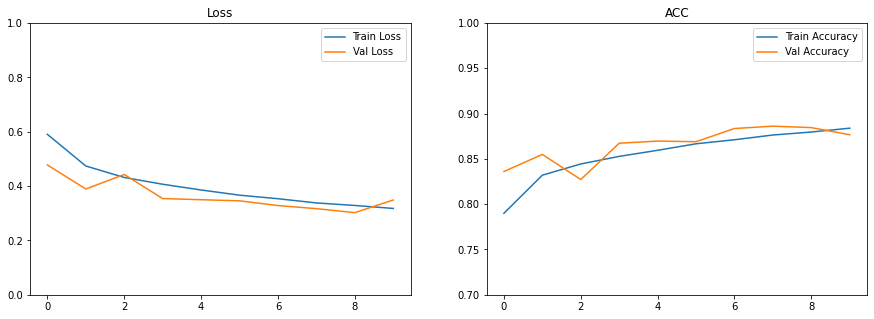

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# Regularization

크기가 큰 α를 유지한다면, 학습은 빠르지만 optima 부근에서 맴돌 뿐 정확히 수렴하기 어려움<br>
크기가 작은 α를 유지한다면, 학습이 매우 느림<br>
Learning rate decay를 사용하면 처음에는 learning rate α를 하여 빠르게 학습을 진행하고, α값이 점차 작아지면서 optima 부근의 매우 좁은 범위까지 집입할 수 있게 함

In [54]:
initializer = keras.initializers.HeUniform(seed = 21)
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_25 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_9 (Activation)   (None, 512)               0         
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_41 (Dense)            (None, 256)               131328    
                                                     

In [55]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
result = model.fit(X_train, y_train, epochs=10, validation_data = (X_val, y_val))

Epoch 1/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.5697 - accuracy: 0.7951 - val_loss: 0.4409 - val_accuracy: 0.8337
Epoch 2/10
1488/1488 [==============================] - 9s 6ms/step - loss: 0.4226 - accuracy: 0.8461 - val_loss: 0.3613 - val_accuracy: 0.8720
Epoch 3/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3705 - accuracy: 0.8641 - val_loss: 0.3354 - val_accuracy: 0.8760
Epoch 4/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3349 - accuracy: 0.8774 - val_loss: 0.3028 - val_accuracy: 0.8875
Epoch 5/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.3141 - accuracy: 0.8846 - val_loss: 0.2971 - val_accuracy: 0.8899
Epoch 6/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.2946 - accuracy: 0.8909 - val_loss: 0.2894 - val_accuracy: 0.8937
Epoch 7/10
1488/1488 [==============================] - 8s 5ms/step - loss: 0.2757 - accuracy: 0.8953 - val_loss: 0.2833 - val_accuracy:

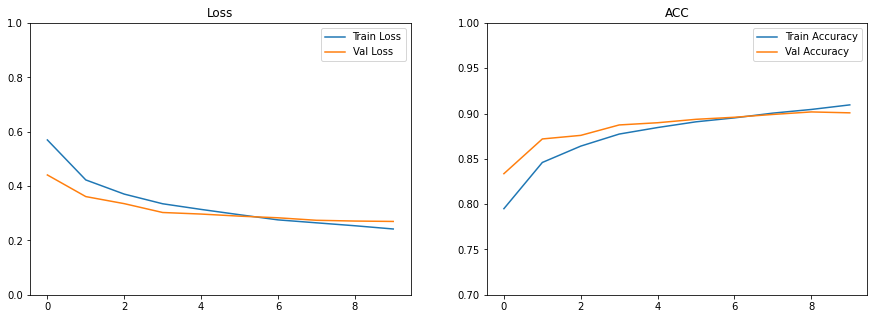

In [57]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

# 최적의 Model

In [58]:
BATCH_SIZE = 128
EPOCHS = 100 # 학습 횟수

In [60]:
initializer = keras.initializers.HeUniform(seed = 21) # He&Relu-> 가중치 고른 분포
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, kernel_initializer=initializer),
    keras.layers.BatchNormalization(), # Data 분포 일정화
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5), # weight 동조현상 방지
    keras.layers.Dense(256, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, kernel_initializer=initializer),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax', kernel_initializer=initializer)
])

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 512)               401920    
                                                                 
 batch_normalization_28 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 512)               0         
                                                                 
 dropout_26 (Dropout)        (None, 512)               0         
                                                                 
 dense_46 (Dense)            (None, 256)               131328    
                                                     

In [61]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001) # learning rate : 보폭, decay : lr 천천히 줄여나감
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )
# val_loss 감소 개선이 없는 epoch이 10번째 지속될 경우 학습 종료
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[earlystopping])

Epoch 1/100
372/372 [==============================] - 3s 6ms/step - loss: 0.6663 - accuracy: 0.7608 - val_loss: 0.4560 - val_accuracy: 0.8347
Epoch 2/100
372/372 [==============================] - 2s 6ms/step - loss: 0.4972 - accuracy: 0.8248 - val_loss: 0.3852 - val_accuracy: 0.8591
Epoch 3/100
372/372 [==============================] - 2s 6ms/step - loss: 0.4498 - accuracy: 0.8413 - val_loss: 0.3610 - val_accuracy: 0.8665
Epoch 4/100
372/372 [==============================] - 2s 5ms/step - loss: 0.4226 - accuracy: 0.8503 - val_loss: 0.3384 - val_accuracy: 0.8724
Epoch 5/100
372/372 [==============================] - 2s 6ms/step - loss: 0.3933 - accuracy: 0.8613 - val_loss: 0.3269 - val_accuracy: 0.8818
Epoch 6/100
372/372 [==============================] - 2s 5ms/step - loss: 0.3750 - accuracy: 0.8660 - val_loss: 0.3148 - val_accuracy: 0.8834
Epoch 7/100
372/372 [==============================] - 2s 5ms/step - loss: 0.3595 - accuracy: 0.8722 - val_loss: 0.3302 - val_accuracy: 0.8771

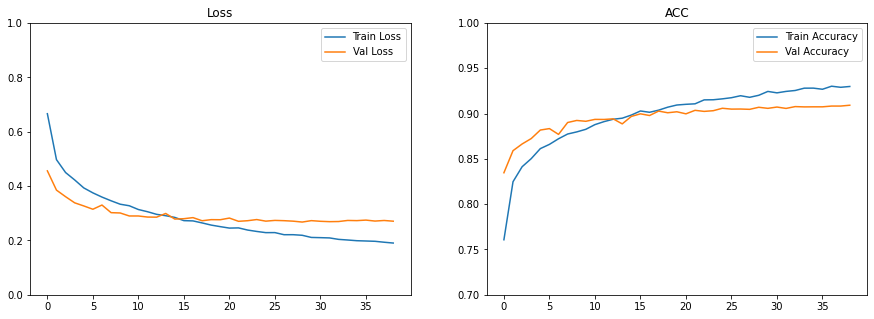

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()

성능 개선을 위해 CNN 사용 (이미지에서 CNN이 성능 좋음)+Dropout 증가

In [64]:
BATCH_SIZE = 128
EPOCHS = 100 # 학습 횟수
earlystopping = EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss',  
                              patience=10,         
                             )

In [67]:
initializer = keras.initializers.HeUniform(seed = 21) 
model = tf.keras.Sequential([
    keras.layers.Conv2D(filters = 64, # input 이미지에서 featuremap을 생성 하는 filter의 갯수
                        kernel_size = 2, 
                        kernel_initializer=initializer, 
                        padding = 'same', # 외곽의 값을 0으로 채워넣어서 filter들로 만들어진 featuremap 기존의 이미지의 크기와 같게 함
                        activation = 'relu', 
                        input_shape = (28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = 2), # pooling 영역에서 가장 큰 값만 남기며 이미지 사이즈를 줄임
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 128, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 256, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(filters = 512, kernel_size = 2, kernel_initializer=initializer, padding = 'same', activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size = 2),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(), # Flaatten으로 이미지를 일차원으로 바꿔줌
    keras.layers.Dense(1024, activation = 'relu'),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(256, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'softmax')
])

print(model.summary())


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 batch_normalization_41 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 14, 14, 128)       32896     
                                                                 
 batch_normalization_42 (Bat  (None, 14, 14, 128)    

In [68]:
optimizer = keras.optimizers.Adam(lr=0.01, decay = 0.001) 
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
result = model.fit(X_train, y_train, epochs=EPOCHS, validation_data = (X_val, y_val), batch_size=BATCH_SIZE,callbacks=[earlystopping])

Epoch 1/100
372/372 [==============================] - 13s 18ms/step - loss: 0.9725 - accuracy: 0.6826 - val_loss: 0.6684 - val_accuracy: 0.7496
Epoch 2/100
372/372 [==============================] - 6s 15ms/step - loss: 0.5380 - accuracy: 0.8045 - val_loss: 0.4032 - val_accuracy: 0.8537
Epoch 3/100
372/372 [==============================] - 6s 16ms/step - loss: 0.4543 - accuracy: 0.8428 - val_loss: 0.3386 - val_accuracy: 0.8762
Epoch 4/100
372/372 [==============================] - 6s 15ms/step - loss: 0.3941 - accuracy: 0.8623 - val_loss: 0.4385 - val_accuracy: 0.8521
Epoch 5/100
372/372 [==============================] - 6s 15ms/step - loss: 0.3631 - accuracy: 0.8746 - val_loss: 0.2840 - val_accuracy: 0.8986
Epoch 6/100
372/372 [==============================] - 6s 16ms/step - loss: 0.3426 - accuracy: 0.8813 - val_loss: 0.2944 - val_accuracy: 0.8966
Epoch 7/100
372/372 [==============================] - 6s 16ms/step - loss: 0.3233 - accuracy: 0.8864 - val_loss: 0.2923 - val_accuracy

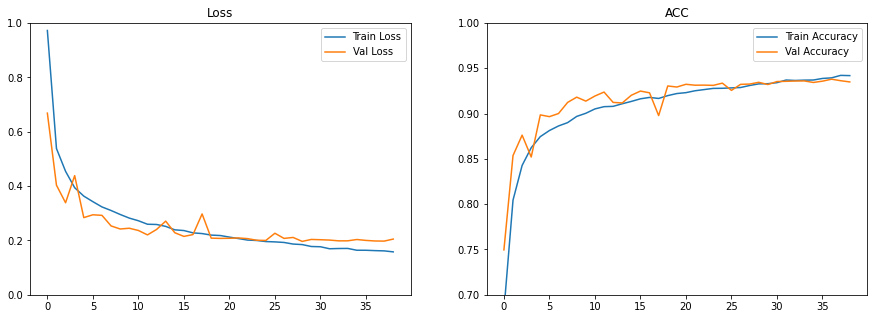

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

axes[0].plot(result.epoch, result.history["loss"], label='Train Loss')
axes[0].plot(result.epoch, result.history['val_loss'], label='Val Loss')
axes[0].set_ylim(0.0, 1)
axes[0].legend()
axes[0].set_title('Loss')

axes[1].plot(result.epoch, result.history['accuracy'], label='Train Accuracy')
axes[1].plot(result.epoch, result.history['val_accuracy'], label='Val Accuracy')
axes[1].set_ylim(0.7, 1)
axes[1].legend()
axes[1].set_title('ACC')

plt.show()